In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = "stock_price.csv"
df = pd.read_csv(data)

In [3]:
print(df.shape)
print(df.info())
display(df.head())

(48, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Date        48 non-null     int64
 1   NIKKEI      48 non-null     int64
 2   HITACHI     48 non-null     int64
 3   TOSHIBA     48 non-null     int64
 4   MITSUBISHI  48 non-null     int64
 5   NEC         48 non-null     int64
 6   FUJITSU     48 non-null     int64
 7   PANASONIC   48 non-null     int64
 8   SONY        48 non-null     int64
dtypes: int64(9)
memory usage: 3.5 KB
None


,Date,NIKKEI,HITACHI,TOSHIBA,MITSUBISHI,NEC,FUJITSU,PANASONIC,SONY
0,200501,11388,688,419,510,594,602,1537,3840
1,200502,11741,663,460,549,679,688,1565,3990
2,200503,11669,666,448,555,648,644,1580,4270
3,200504,11009,620,430,556,578,578,1537,3920
4,200505,11277,652,445,592,603,597,1622,4060


In [6]:
df_num = df.loc[:,"NIKKEI":]

In [8]:
df_corr = df_num.corr() 
display(df_corr)

,NIKKEI,HITACHI,TOSHIBA,MITSUBISHI,NEC,FUJITSU,PANASONIC,SONY
NIKKEI,1.000000,0.820419,0.825605,0.804968,0.621368,0.879986,0.856393,0.907624
HITACHI,0.820419,1.000000,0.670851,0.655384,0.661257,0.704448,0.788437,0.879052
TOSHIBA,0.825605,0.670851,1.000000,0.939484,0.255770,0.644309,0.707113,0.842716
MITSUBISHI,0.804968,0.655384,0.939484,1.000000,0.186838,0.619232,0.700304,0.800375
NEC,0.621368,0.661257,0.255770,0.186838,1.000000,0.734784,0.579141,0.556657
FUJITSU,0.879986,0.704448,0.644309,0.619232,0.734784,1.000000,0.874444,0.723135
PANASONIC,0.856393,0.788437,0.707113,0.700304,0.579141,0.874444,1.000000,0.783069
SONY,0.907624,0.879052,0.842716,0.800375,0.556657,0.723135,0.783069,1.000000


In [9]:
print(df_num.corrwith(df_num['NIKKEI']))

NIKKEI        1.000000
HITACHI       0.820419
TOSHIBA       0.825605
MITSUBISHI    0.804968
NEC           0.621368
FUJITSU       0.879986
PANASONIC     0.856393
SONY          0.907624
dtype: float64


<Axes: >

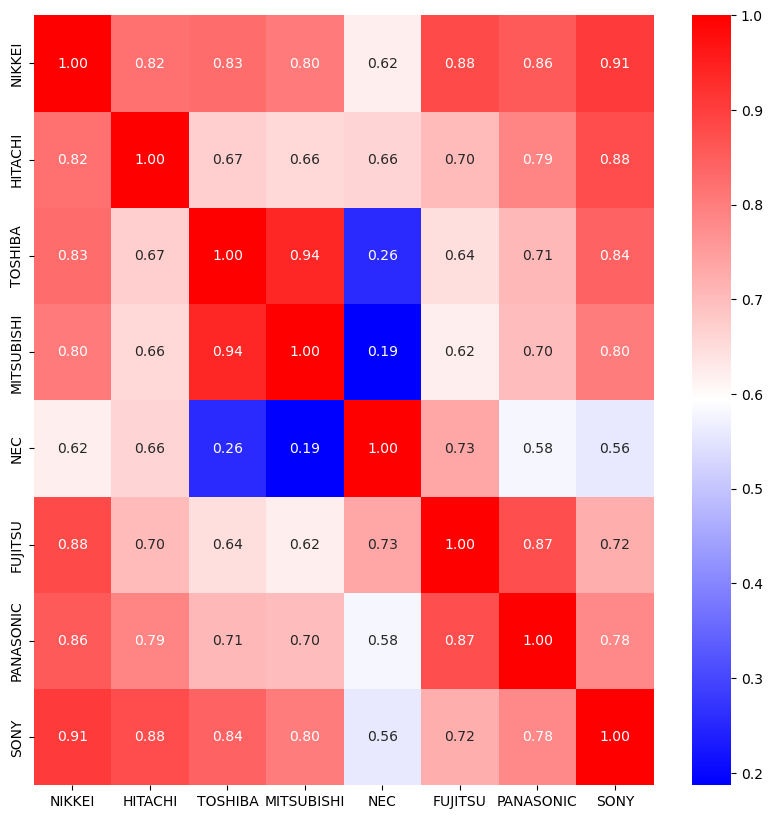

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='bwr')

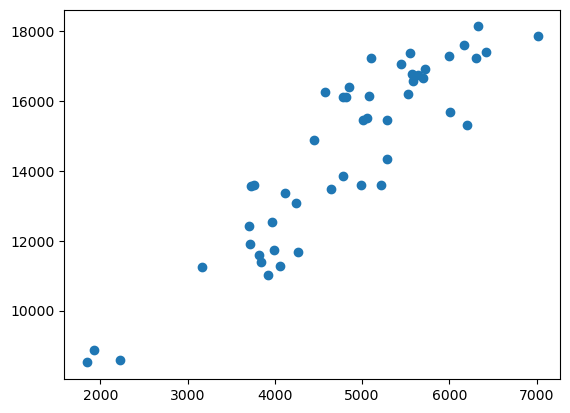

In [13]:
plt.scatter(df['SONY'], df['NIKKEI'])

In [14]:
X = df[['SONY']]
y = df['NIKKEI']
X_c = sm.add_constant(X)
model = sm.OLS(y, X_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 NIKKEI   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           5.86e-19
Time:                        14:13:36   Log-Likelihood:                -403.59
No. Observations:                  48   AIC:                             811.2
Df Residuals:                      46   BIC:                             814.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4599.9342    693.300      6.635      0.0

In [15]:
print(results.rsquared_adj)
print(results.params['SONY'])

0.8199510276303702
2.0701347549783238


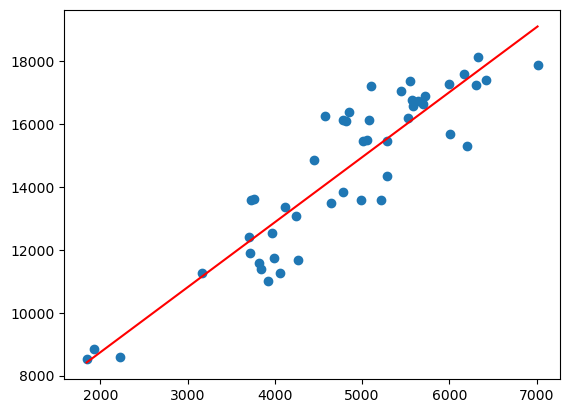

In [16]:
a0 = results.params['const']
a1 = results.params['SONY']
x_min = X['SONY'].min()
x_max = X['SONY'].max()
x_min_max = np.array([x_min, x_max])
y_min_max = a0 + a1 * x_min_max

plt.scatter(X['SONY'], y)
plt.plot(x_min_max, y_min_max, c='red')

In [17]:
x_test = 3000
y_test = a0 + a1 * x_test
print(y_test)

10810.338443619283


In [18]:
x_test = np.array([3000])
x_test_c = sm.add_constant(x_test, has_constant='add')
y_test = results.predict(x_test_c)
print('{:.1f}'.format(y_test[0]))

10810.3
